In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
#%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [19]:
Target_Univ = ["Florida International University  Miami, FL", "Florida State University  Tallahassee, FL",
               "University of Central Florida  Orlando, FL",
               "University of Florida  Gainesville, FL",
               "University of South Florida-Main Campus  Tampa, FL"]

In [20]:
# Creating Formatting Function
def Top_Univ(df):
    df = df.loc[df['State'] == "FL"]
    df = df.loc[df['School Name'].str.replace(" ", "").isin([x.replace(" ", "") for x in Target_Univ])]
    df.insert (0, "School Abreviation", ["FIU", "FSU", "UCF", "UF", "USF"])
    df.index = [0,1,2,3,4]
    c1 = df.columns[-1]
    column_arrang = df.columns.insert(0, c1)
    df = df[column_arrang]
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [35]:
# Creating a function that generate scatter plot
def Plot(p1, p2):
    fig, ax = plt.subplots()
    # Scatter Plot of Data using Seaborn
    
    plt.scatter(p1, p2, alpha=0.5)
    sns.regplot(p1, p2)
    #plt.legend()
    fig.savefig(f'{p1.name}_{p2.name}.png', dpi=100)    
    return plt.show()

In [24]:
#Formatting Florida SAT_ACT df
ACT_SAT = pd.DataFrame(pd.read_csv("data/SAT_ACT.csv"))

ACT_SAT = ACT_SAT.replace('-',0)
ACT_SAT.drop(ACT_SAT.head().columns[[0,1]], axis = 1, inplace = True)
for column in ACT_SAT.columns[2:-1] :
    ACT_SAT[column] = ACT_SAT[column].str.rstrip('(MT only), (CM O, (MTEN').str.replace(',', '').fillna(0).astype('int')
Avg_ACT_SAT = ACT_SAT.groupby('State').mean().reset_index()

target_ACT_SAT = Top_Univ(ACT_SAT)

In [25]:
#Formatting Gradution Table
Graduation = pd.DataFrame(pd.read_csv("data/Graduation.csv"))
Graduation = Graduation.replace('-',0)
Graduation.drop(Graduation.columns[[0,1]], axis = 1, inplace = True)
for column in Graduation.columns[1:-1] :
    Graduation[column] = Graduation[column].str.strip('%').str.replace(',','').fillna(0).astype('float')
target_graduation = Top_Univ(Graduation)

In [26]:
#Formatting Tuition df
Tuition = pd.DataFrame(pd.read_csv("data/Tuition.csv"))
Tuition = Tuition.drop(0)
Tuition = Tuition.replace('-',0)
Tuition.drop(Tuition.columns[[0,1]], axis = 1, inplace = True)
for column in Tuition.columns[1:-1] :
    Tuition[column] = Tuition[column].str.strip('$, ').str.replace(',','').fillna(0).astype('float')
target_tuition = Top_Univ(Tuition)

In [27]:
#Formatting Acceptance Table
Accept = pd.DataFrame(pd.read_csv("data/Acceptance.csv"))
Accept.drop(Accept.columns[[0,1]], axis = 1, inplace = True)
for column in Accept.columns[1:-1] :
    try:
        Accept[column] = [round(float(x.strip("$,%")),2) for x in Accept[column]]
    except:
        pass
target_acceptance = Top_Univ(Accept)

In [28]:
#Formatting Acceptance Table
Student_p = pd.DataFrame(pd.read_csv("data/Students_pop.csv"))
Student_p.drop(Student_p.columns[[0,1]], axis = 1, inplace = True)
for column in Student_p.columns[1:-1] :
    try:
        Student_p[column] = [round(float(x.strip("$,%")),2) for x in Student_p[column]]
    except:
        pass
target_studentP = Top_Univ(Student_p)

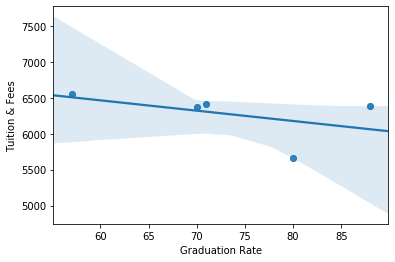

In [36]:
# Genrating new table with all my parameters
Grad_rate = target_graduation["Graduation Rate"]
Tuit_fee = target_tuition["Tuition & Fees"]
Accept_rate = target_acceptance["Acceptance Rate"]
school_sz = target_studentP["Total"]
SAT_75 = target_ACT_SAT["SAT 75% Percentile"]

Plot(Grad_rate, Tuit_fee)

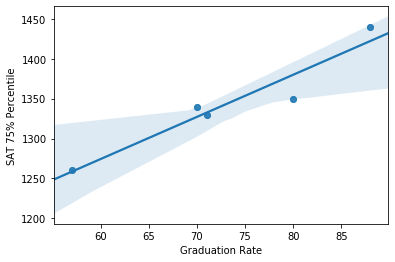

In [37]:
Plot(Grad_rate, SAT_75)

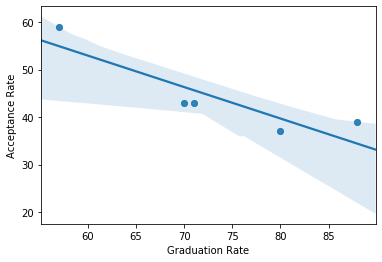

In [38]:
Plot(Grad_rate, Accept_rate)

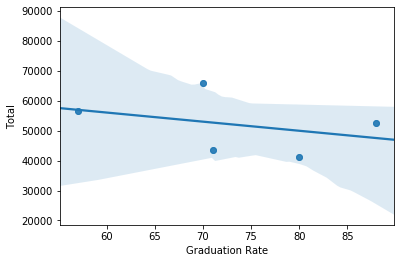

In [39]:
Plot(Grad_rate, school_sz)